In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import random

import pandas as pd
import seaborn as sns

from scipy.stats import norm
import matplotlib.mlab as mlab

from scipy.stats import binom


In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

     |████████████████████████████████| 47 kB 1.3 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=c9cc49f649d42d58b1e7c3eaa6a550484c98c90b693ecccabf4bb74937033463
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=2744f02a3c0cb5992a2b5ca740a80fb15a39d383a57e4be5e12849600160ff82
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


# 1. PMLS2, problem 3.3

##3.3.a

In [ ]:
data= np.loadtxt("g26perrindata.csv",delimiter=',')
x_data= data[:,0]
y_data= data[:,1]

data.shape

(508, 2)

1.2320099999999998e-29
312.9451718552014


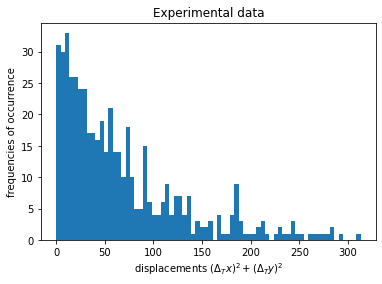

In [ ]:
# length-squared of the displacements
len_sq_a = x_data**2 + y_data**2

# Find the range of values
print(len_sq_a.min())
print(len_sq_a.max())

# plot
plt.hist(len_sq_a, bins=70)
plt.title("Experimental data")
plt.xlabel('displacements $(\Delta_{T}x)^{2}+(\Delta_{T}y)^{2}$')
plt.ylabel('frequencies of occurrence')
plt.show()

##3.3.b

1000
1000
0.0
8676.0


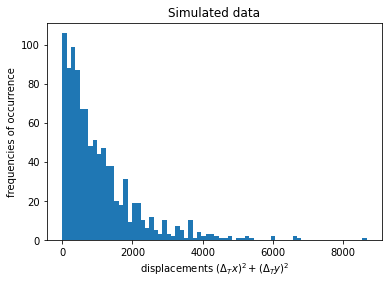

In [ ]:
# random pick value from [-1, 1]
x_walks = np.array([])
y_walks = np.array([])

# simulate 1000 such walks
walk = 0
while walk < 1000: 
    # at each step draw two independent random variable from [+1, -1]
    # accumultate for 500 steps
    x_steps = random.choices([1, -1], k=500)
    y_steps = random.choices([1, -1], k=500)
    x_walks = np.append(x_walks, sum(x_steps))
    y_walks = np.append(y_walks, sum(y_steps))
    walk += 1

print(len(x_walks))
print(len(y_walks))

# length-squared of the displacements
len_sq = x_walks**2 + y_walks**2

# Find the range of values
print(len_sq.min())
print(len_sq.max())

# plot
plt.hist(len_sq, bins=70)
plt.title("Simulated data")
plt.xlabel('displacements $(\Delta_{T}x)^{2}+(\Delta_{T}y)^{2}$')
plt.ylabel('frequencies of occurrence')
plt.show()

##3.3.c

In [ ]:
get_distributions()

,sumsquare_error,aic,bic,kl_div
beta,1.301416e-07,2263.159373,-22734.766984,inf
halfnorm,5.922299e-07,2644.674382,-21233.310690,inf


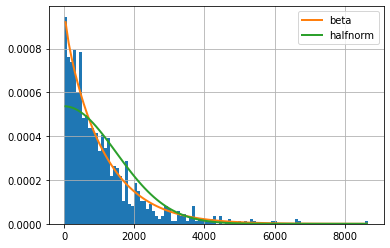

In [ ]:
# fit distribution to the simulated data
f = Fitter(len_sq,
           distributions=[#'gamma',
                          "beta",
                          "halfnorm"
                          ])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
gamma,0.000191,1318.459916,-7495.676276,inf
beta,0.000226,1309.559797,-7404.922308,inf
halfnorm,0.000384,1343.001417,-7148.444718,inf


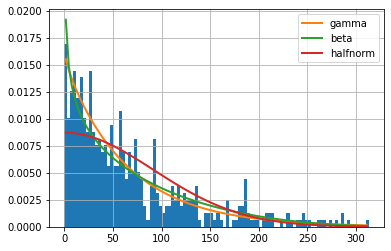

In [ ]:
# fit distribution to the experimental data
f = Fitter(len_sq_a,
           distributions=['gamma',
                          "beta",
                          "halfnorm"
                          ])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,0.012432,786.38201,-5381.461155,inf


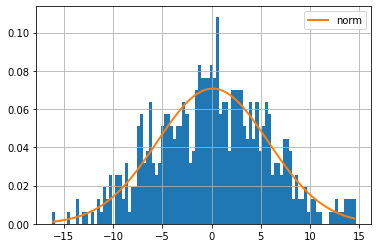

In [ ]:
# x_data
# y_data
# x_walks
# y_walks
# eu_dist = np.sqrt(x_data**2 + y_data**2)


f = Fitter(x_data,
           distributions=["norm"
                          ])
f.fit()
f.summary()

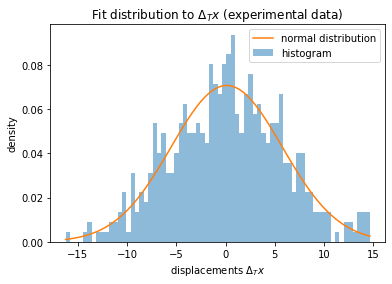

In [ ]:
_, bins, _ = plt.hist(x_data, 70, density=1, alpha=0.5)

(mu, sigma) = norm.fit(x_data)

best_fit_line = norm.pdf(bins, mu, sigma)

plt.title("Fit distribution to $\Delta_{T}x$ (experimental data)")
plt.xlabel('displacements $\Delta_{T}x$')
plt.ylabel('density')
plt.plot(bins, best_fit_line)
plt.legend(['normal distribution', 'histogram'])

##4.3.a

r	p(r)
0.0	0.003906250000000001
1.0	0.031250000000000014
2.0	0.10937500000000006
3.0	0.21875000000000014
4.0	0.27343750000000017
5.0	0.21875000000000014
6.0	0.10937500000000006
7.0	0.031250000000000014
8.0	0.003906250000000001
mean = 4.0
variance = 2.0


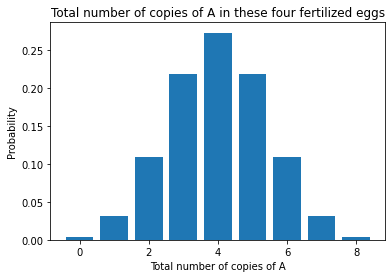

In [ ]:
# frequency of allele A in the new generation
# binomial distribution

# setting the values
# of n and p
n = 8
p = 0.5
# defining the list of r values
r_values = np.linspace(0,8,num=9,endpoint=True)

# obtaining the mean and variance 
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# printing the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

# plotting the graph 
plt.bar(r_values, dist)

plt.title("Total number of copies of A in these four fertilized eggs")
plt.xlabel('Total number of copies of A')
plt.ylabel('Probability')
plt.show()

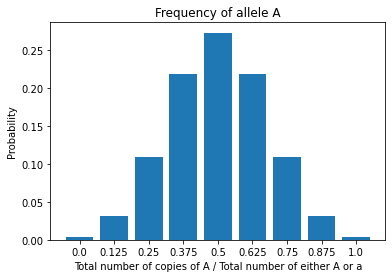

In [ ]:
# plotting the graph 
freq_A = list(np.linspace(0,1,num=9,endpoint=True))
x_labels = [str(x) for x in freq_A]
plt.bar(x_labels, dist)

plt.title("Frequency of allele A")
plt.xlabel('Total number of copies of A / Total number of either A or a')
plt.ylabel('Probability')
plt.show()

##4.6.a

In [ ]:
# retrun a list of the locations of the bin edges appropriate for computing Poisoon distribution
def poissonSetup(mu):
    # number of bins
    if mu*10 < 10:
        bins = 10
    elif mu > 17: # to prevent overflow
        bins = 170
    else:
        bins = round(mu * 10)

    # list of locations of the bin edges
    loc = [0]
    for l in range(bins):
        loc.append(loc[l] + (mu**l) * math.exp(-mu) / math.factorial(l))

    return loc

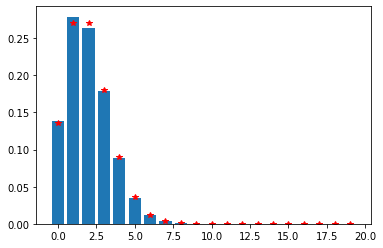

In [ ]:
from scipy.stats import poisson as pois_obj
mu = 2
N = 10000
mybins= poissonSetup(mu)
phist, bins =np.histogram(np.random.random(N),bins=mybins)
x= np.arange(len(phist))
plt.bar( x,phist/N,align='center')
exact= pois_obj(mu)
plt.plot( x, exact.pmf(x),'r*')

##4.6.b

[0, 0.1353352832366127, 0.4060058497098381, 0.6766764161830635, 0.8571234604985472, 0.9473469826562889, 0.9834363915193857, 0.9954661944737513, 0.9989032810321414, 0.999762552671739, 0.9999535019249829, 0.9999916917756316, 0.9999986353848405, 0.999999792653042, 0.9999999706943037, 0.9999999961287697, 0.9999999995200318, 0.9999999999439396, 0.9999999999938112, 0.9999999999993524, 0.9999999999999357]
mean = 2.0092
variance = 1.9707153600000002


Text(0, 0.5, 'frequency')

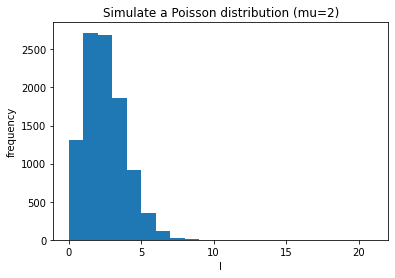

In [ ]:
# get the edge locations for Poisson distribution with mu = 2
edge_loc = poissonSetup(2)
print(edge_loc)
# list of frequencies of each l
freq_l = [0] * (len(edge_loc)-1)

# list of l
l_list = []

# generate 10,000 numbers from the distribution
i = 0
while i < 10000:
    r = random.uniform(0, 1)
    # defining the l value
    l_h = 0
    while r > edge_loc[l_h]:
        l_final = l_h
        l_h += 1

    freq_l[l_final] += 1
    l_list.append(l_final)
    i += 1

# find the sample mean
l_array = np.array(l_list)
mean_l = np.mean(l_array)
var_l = np.mean((l_array - mean_l)**2)

print("mean =", mean_l)
print("variance =", var_l)


# make a histogram
plt.hist(l_list, range=(0, len(edge_loc)), bins=len(edge_loc))
plt.title("Simulate a Poisson distribution (mu=2)")
plt.xlabel('l')
plt.ylabel('frequency')

##4.6.c

mean = 19.941
variance = 19.828919


Text(0, 0.5, 'frequency')

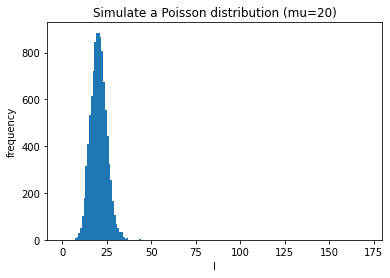

In [ ]:
# get the edge locations for Poisson distribution with mu = 20
edge_loc = poissonSetup(20)

# list of frequencies of each l
freq_l = [0] * (len(edge_loc)-1)

# list of l
l_list = []

# generate 10,000 numbers from the distribution
i = 0
while i < 10000:
    r = random.uniform(0, 1)
    # defining the l value
    l_h = 0
    while r > edge_loc[l_h]:
        l_final = l_h
        l_h += 1

    freq_l[l_final] += 1
    l_list.append(l_final)
    i += 1

# find the sample mean
l_array = np.array(l_list)
mean_l = np.mean(l_array)
var_l = np.mean((l_array - mean_l)**2)

print("mean =", mean_l)
print("variance =", var_l)


# make a histogram
plt.hist(l_list, range=(0, len(edge_loc)), bins=len(edge_loc))
plt.title("Simulate a Poisson distribution (mu=20)")
plt.xlabel('l')
plt.ylabel('frequency')

##4.9.a

l	P_pois
0	0.1353352832366127
1	0.2706705664732254
2	0.2706705664732254
3	0.1804470443154836
4	0.0902235221577418
5	0.03608940886309672
6	0.012029802954365574
7	0.0034370865583901638
8	0.0008592716395975409
9	0.00019094925324389798
10	3.8189850648779595e-05
11	6.943609208869018e-06
12	1.1572682014781697e-06
13	1.7804126176587226e-07
14	2.5434465966553178e-08
15	3.391262128873757e-09
16	4.2390776610921964e-10
17	4.987150189520231e-11
18	5.541277988355812e-12
19	5.832924198269276e-13


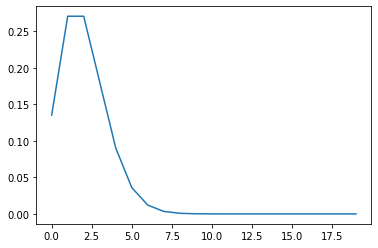

In [ ]:
def poissonPlot(mu):
    # number of bins
    if mu*10 < 10:
        bins = 10
    elif mu > 17:
        bins = 170
    else:
        bins = round(mu * 10)

    # defining the list of l values
    l_values = range(bins)

    # list of probabilities for each l
    dist = []
    for l in l_values:
        dist.append((mu**l) * math.exp(-mu) / math.factorial(l))
    # print P_pois values
    print("l\tP_pois")
    for i in range(len(dist)):
        print(str(l_values[i]) + "\t" + str(dist[i]))
    
    plt.plot(l_values, dist)


poissonPlot(2)

l	P_pois
0	0.009999999999880918
1	0.04605170185945161
2	0.10603796220885363
3	0.16277428738280247
4	0.18740082382566947
5	0.17260253734276226
6	0.1324773431664734
7	0.08715438729581917
8	0.05017009824422544
9	0.02567131562922199
10	0.011822077737108895
11	0.0049493345392280196
12	0.0018993773217160768
13	0.0006728427549178006
14	0.00022132538534382567
15	6.79494043993565e-05
16	1.955741070602336e-05
17	5.297953217572704e-06
18	1.3554431224660328e-06
19	3.2852875033680625e-07
20	7.564654031474488e-08
21	1.6588818672929053e-08
22	3.4724696897060438e-09
23	6.952745168183888e-10
24	1.3341072816406664e-10
25	2.4575164313348408e-11
26	4.352800538918586e-12
27	7.42421750645652e-13
28	1.2210637541111722e-13
29	1.9390366881510363e-14
30	2.976531315277777e-15
31	4.4217526680040594e-16
32	6.363413611424454e-17
33	8.880182619551054e-18
34	1.202786830758585e-18
35	1.5825823008922463e-19
36	2.024461341377848e-20
37	2.5197267600061715e-21
38	3.0536238294859987e-22
39	3.605758312514889e-23
40	4.151282

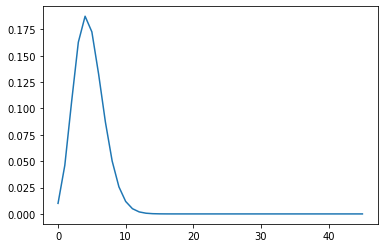

In [ ]:
poissonPlot(4.605170186)

##4.16.a

In [ ]:
# find the number of resistant mutant cells
def cellCulture(g = 21, alphag = 2*(10**-9), C = 500, n0 = 200):
    m_list = []
    for c in range(C): # for each culture
        n_total = n0
        n_wt = n0
        m = 0 # init number of cells with resistant mutant
        for g_i in range(g): # loop through g doublings
            mu = alphag * n_wt # get mu for Poisson
            # get the edge locations for Poisson distribution
            edge_loc = poissonSetup(mu)
            r = random.uniform(0, 1)
            # defining the m value got in this doubling
            m_h = 0
            while r > edge_loc[m_h]:
                m_new = m_h
                m_h += 1
            
            # doubling
            n_total = n_total * 2 # number of total cells
            m = m * 2 + m_new # number of resistant cells
            n_wt = n_total - m # number of WT cells

        m_list.append(m) # number of resistant cells after g doublings in current culture
    
    return m_list

##4.16.b

5.076 474.498224


Text(0, 0.5, 'density')

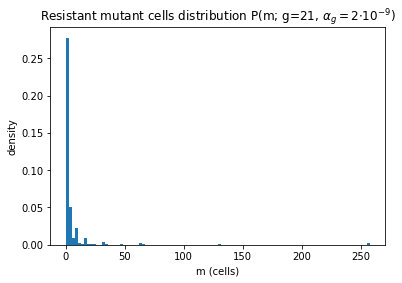

In [ ]:
# # define variables
# C = 500             # C cultures
# n0 = 200            # each contains n0 bacteria initially
# alphag = 2*(10**-9) # probability of getting resistant mutants
# g = 21              # doublings

m_list = cellCulture(g = 21, alphag = 2*(10**-9), C = 500, n0 = 200)
m_array = np.array(m_list)

# Sample mean, variance
mean_m = np.mean(m_array)
var_m = np.mean((m_array - mean_m)**2)
print(mean_m, var_m)

# plot your result as an estimated probability distribution P(m; g, alphag)
plt.hist(m_array, bins=100, density=1)
plt.title("Resistant mutant cells distribution P(m; g=21, $\u03B1_{g}=2⋅10^{-9}$)")
plt.xlabel('m (cells)')
plt.ylabel('density')

## 4.16.c

mean: 6.164 
var: 2320.8971040000006


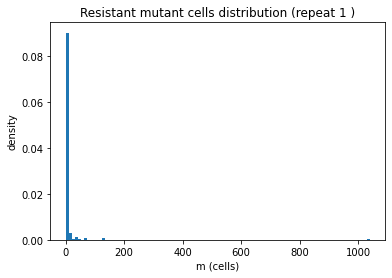

mean: 3.084 
var: 57.204944


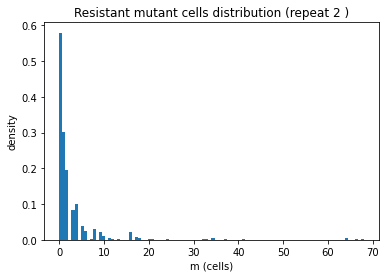

mean: 5.558 
var: 2187.4266359999997


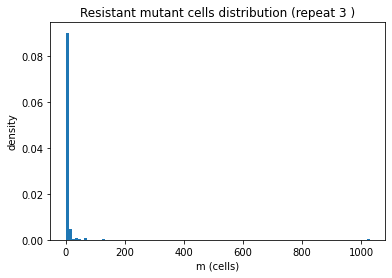

In [ ]:
# repeat the simulation 3 times
for M in range(3):
    m_list = cellCulture(g = 21, alphag = 2*(10**-9), C = 500, n0 = 200)
    m_array = np.array(m_list)

    # Sample mean, variance
    mean_m = np.mean(m_array)
    var_m = np.mean((m_array - mean_m)**2)
    print("mean:", mean_m, "\nvar:", var_m)

    # plot your result as an estimated probability distribution P(m; g, alphag)
    plt.hist(m_array, bins=100, density=1)
    plt.title("Resistant mutant cells distribution (repeat " + str(M+1) + " )")
    plt.xlabel('m (cells)')
    plt.ylabel('density')
    plt.show()

## 4.16.d

In [ ]:
# get the number of i* and m
def get_i_m(g = 21, alphag = 2*(10**-9), C = 500, n0 = 200):
    i_m_arr = np.zeros([2, C])
    for c in range(C): # for each culture
        n_total = n0
        n_wt = n0
        m = 0 # init number of cells with resistant mutant
        for g_i in range(g): # loop through g doublings
            mu = alphag * n_wt # get mu for Poisson
            # get the edge locations for Poisson distribution
            edge_loc = poissonSetup(mu)
            r = random.uniform(0, 1)
            # defining the m value got in this doubling
            m_h = 0
            while r > edge_loc[m_h]:
                m_new = m_h
                m_h += 1
            if m_h != 0 and m == 0: # the first mutant appears
                i_m_arr[0, c] = g_i+1 # record i*
            
            # doubling
            n_total = n_total * 2 # number of total cells
            m = m * 2 + m_new # number of resistant cells
            n_wt = n_total - m # number of WT cells

        if m == 0: # if never
            i_m_arr[0, c] = g + 1
        i_m_arr[1, c] = m # number of resistant cells after g doublings in current culture   
    return i_m_arr

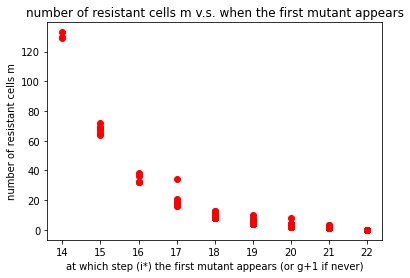

In [ ]:
i_m_arr = get_i_m(C=500)

# plot your result as an estimated probability distribution P(m; g, alphag)
plt.plot(i_m_arr[0], i_m_arr[1],'ro')
plt.title("number of resistant cells m v.s. when the first mutant appears")
plt.xlabel('at which step (i*) the first mutant appears (or g+1 if never)')
plt.ylabel('number of resistant cells m')
plt.show()

##4.19

19.805483021952085


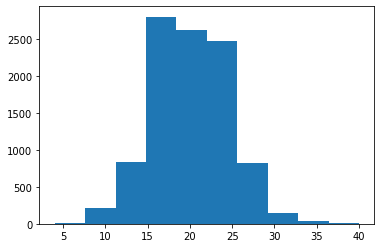

In [ ]:
mu = 20
l = np.random.poisson(lam=mu, size=10000)
plt.hist(l)
# range(0,10*mu)
l_mean = np.mean(l)

print(np.mean((l-l_mean)**3))